#Tarea 4

Ciro Gelvez y Juan Sebastian Vargas

##Difracción de Fraunhofer

###Punto A

Comenzando con un array de ceros de lado 1024 manipularlo con ciclos o usando slice notation para dejar todo en cero excepto elementos en un cuadrado de lado 32 en el centro.

In [1]:
#Se importan las librerias numpy y matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Creamos un array vacío de 1024*1024
ceros = np.zeros((1024,1024))
#Creamos un array de 32*32 en el centro del más grande
ceros[512-(32/2):512+(32/2), 512-(32/2):512+(32/2)] = 1

###Punto B

Calcular la DFT del array resultante y aplicar sobre él la función fftshift, esto hace un cambio de coordenadas que arroja el patrón de interferencia esperado. De lo resultante tomar del centro un cuadrado de lado 200 y producir una imagen del logaritmo del módulo al cuadrado usando imshow con la representación de la apertura a su izquierda.

In [3]:
#Se realiza la transformada de Fourier (Discreta) para el array de ceros
TransDisc = np.fft.fft2(ceros)
#Se aplica la función fftshift a la transformada anterior
TransDisc = np.fft.fftshift(TransDisc)
#Se hace el módulo de lo anterior al cuadrado + 1 ya que se genera un error por el log(0)
TransDisc = np.abs(TransDisc)**2+1
#Se realiza el logaritmo de lo anterior
TransDisc = np.log(TransDisc)
#Se toma del centro un cuadrado de lado 200
TransDisc = TransDisc[412:612,412:612]

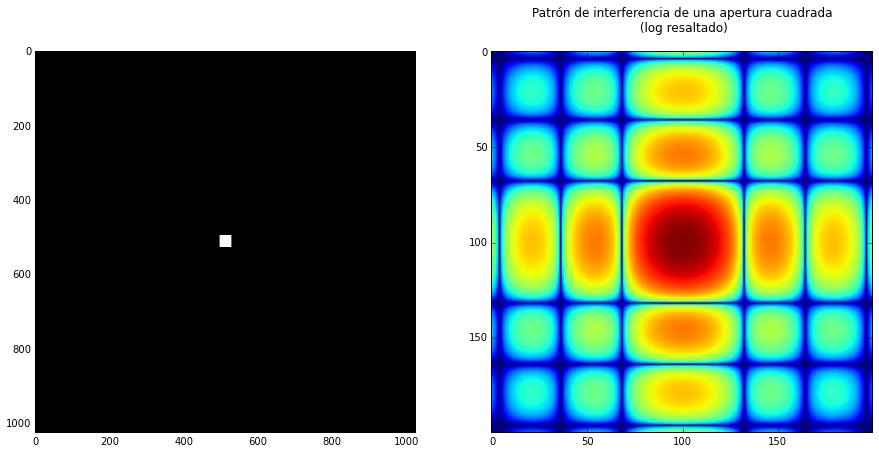

In [4]:
#Finalmente graficamos el cuadrado de 32*32 y su patrón de interferencia
plt.figure(figsize=(15,15))        
plt.subplot(1,2,1,aspect='equal')
plt.imshow(ceros,cmap='gray')
plt.subplot(1,2,2,aspect='equal')
plt.title(u'Patrón de interferencia de una apertura cuadrada \n (log resaltado) \n')
plt.imshow(TransDisc)
plt.show()

###Punto C

Repita los dos anteriores literales para una doble rendija cada una de ellas con una altura de 200, grosor 20 y con sus ejes en las columnas 460 y 564. Esta vez tome un cuadrado de lado 128 para la gráfica del patrón de difracción y no resalte con log.

In [5]:
#Creamos un array de 200*20 en el centro del más grande
ceros[412:612,450:470] = 1
#Creamos un array de 200*20 en el centro del más grande
ceros[412:612,554:574] = 1
#Se realiza la transformada de Fourier (Discreta) para el array de ceros
TransDis = np.fft.fft2(ceros)
#Se aplica la función fftshift a la transformada anterior
TransDis = np.fft.fftshift(TransDis)
#Se hace el módulo de lo anterior al cuadrado
TransDis = np.abs(TransDis)**2 
#Se toma del centro un cuadrado de lado 128
TransDis = TransDis[448:576,448:576]

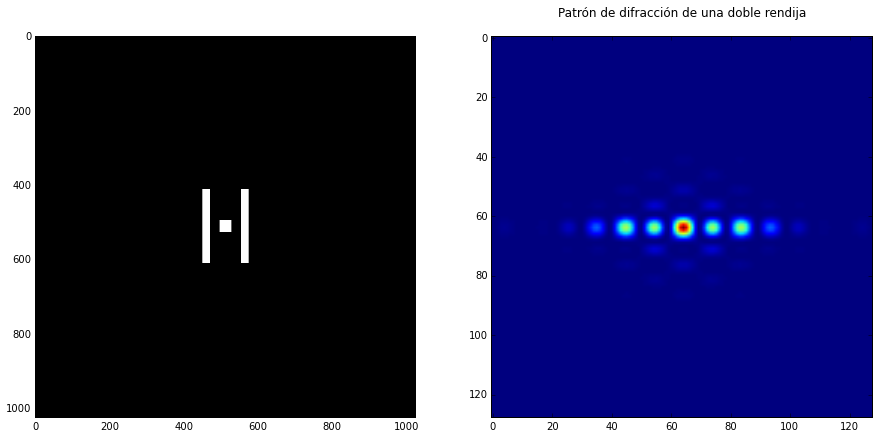

In [6]:
#Finalmente graficamos la doble rendija y su patrón de interferencia
plt.figure(figsize=(15,15))        
plt.subplot(1,2,1,aspect='equal')
plt.imshow(ceros,cmap='gray')
plt.subplot(1,2,2,aspect='equal')
plt.title(u'Patrón de difracción de una doble rendija \n',fontsize=12)
plt.imshow(TransDis)
plt.show()

###Punto D
Ahora hágalo para una apertura circular de radio 0.01 u y además de lo anterior tome ahora la fila central y tomando como abscisas 2*pi*radio/1.*linspace(-512,512,1024) reproduzca la gráfica mostrada abajo; las abscisas están así elegidas para hacer comparable nuestro resultado con lo mostrado en la pág. 396 de los Principles de Born. $I_0$ es la amplitud máxima.

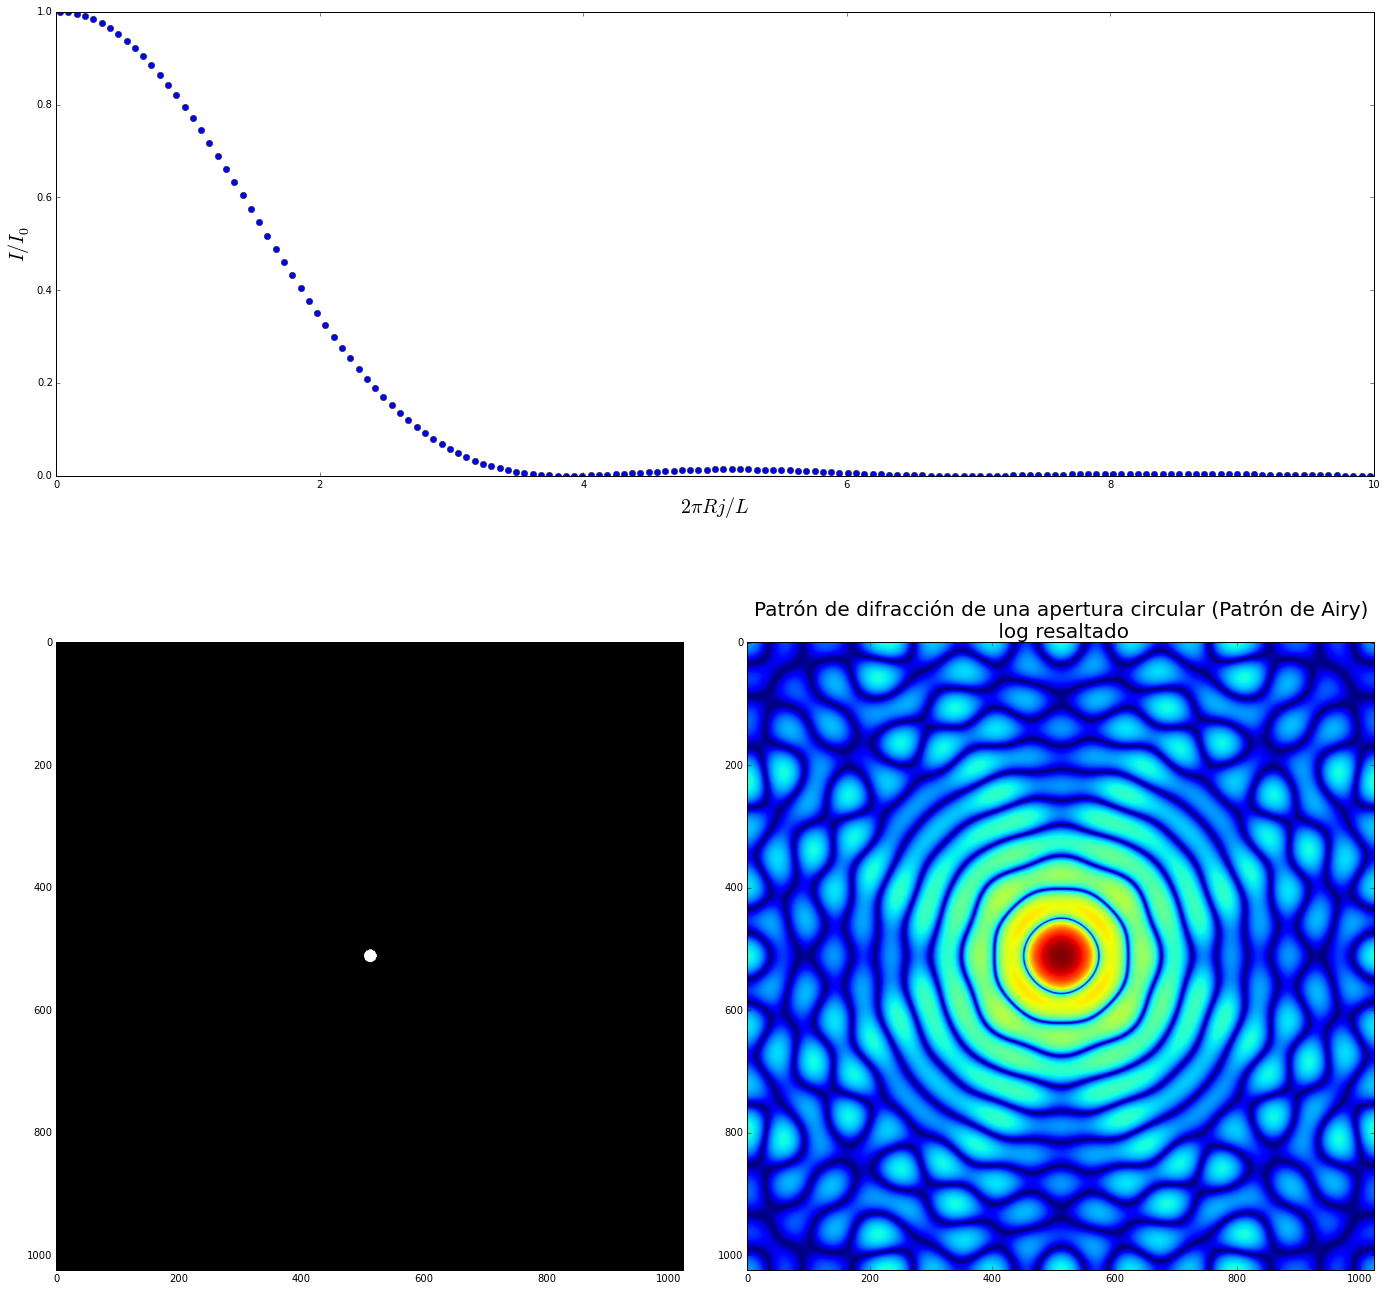

In [7]:
#RADIO dado por enunciado 
r=0.01
r2= ((1024*r)**2)

#el centro del circulo
X,Y=512,512
#un arreglo de booleanos que representa los puntos que estan el el circulo
circulo = np.array([[(((x-X)**2+(y-Y)**2) <= r2) for x in range(1024)] for y in range(1024)])
# Hago la Transformada de Fourier Discreta (DFT) teniendo en cuenta que tengo 
#una array bidimensional.
trans = np.fft.fft2(circulo) 

# se aplica la función shift a la transformada, como dice el enunciado
trans = np.fft.fftshift(trans)
#el modulo al cuadrado mas uno, como dicen los comentarios
Trans= np.abs(trans)**2 +1

# el logaritmo del módulo
transF = np.log(Trans) 
# se grafica lo anterior

plt.figure(figsize=(20,20)) 
#primera grafica
plt.subplot2grid((3,2),(0,0),colspan=2,rowspan=1)
x = (2.*np.pi*0.01)*np.linspace(-512,512,1024)
plt.plot(x,Trans[512]/max(Trans[512]),'bo')
plt.xlim(0.,10.)
plt.xlabel(r'$2\pi$'+'$Rj/L$',fontsize=20)
plt.ylabel('$I/I_0$',fontsize=20)
#se grafica la placa, el circulo
plt.subplot2grid((3,2),(1,0),rowspan=2)
plt.imshow(circulo,cmap='Greys_r')
#se grafica el patron de interferencia 
plt.subplot2grid((3,2),(1,1),rowspan=2)
plt.title(u'Patrón de difracción de una apertura circular (Patrón de Airy) \n log resaltado',fontsize=20)
plt.imshow(transF)

plt.tight_layout()
plt.show()

###Quinto punto
Usando las mismas ordenadas y abscisas del anterior literal calcular los máximos y mı́nimos entre 0. y 12.0. Al hacerlo debe utilizar interpolación en algún momento. Compare sus resultados con la tabla mostrada en la pág. 397

In [8]:
from scipy import interpolate
#interpolacion cubica
r = 1024*0.01
x = (2.*np.pi*r/1024.)*np.linspace(-512,512,1024)
y = Trans[512]/max(Trans[512])

interpolacion = interpolate.interp1d(x,y,kind='cubic')

[Maximos y minimos info](http://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array)

In [9]:
from scipy.signal import argrelextrema #herramienta para buscar los máximos y mínimos
# Arreglos con los índices de los máximos y minimos locales.
loc_max = argrelextrema(interpolacion(x), np.greater) 
loc_min = argrelextrema(interpolacion(x), np.less)   

In [10]:
from tabulate import tabulate 
#para crear tablas mas facilmente

datos teoricos

In [11]:
#se copia la tabla del enunciado para comparar
teo = [[0,1, 'Max'],[3.833,0,'Min'],[5.136,0.0175,'Max'],[7.016,0,'Min'],[8.417,0.0042,'Max'],[10.174,0,'Min'],[11.620,0.0016,'Max']]
headers = ["val de x para max y min locales","valores de la funcion", "Min o Max"]        
print tabulate(teo, headers)



  val de x para max y min locales    valores de la funcion  Min o Max
---------------------------------  -----------------------  -----------
                            0                       1       Max
                            3.833                   0       Min
                            5.136                   0.0175  Max
                            7.016                   0       Min
                            8.417                   0.0042  Max
                           10.174                   0       Min
                           11.62                    0.0016  Max


In [12]:
maxTa = []
minTa = []

for i in loc_max[0]:
    # como dice el enunciado vamos del 0 al 12
    if(0.<=x[i] and x[i]<=12.): 
        rta=[x[i],float(interpolacion(x[i]))]#lo que voy a agregar a la tabla
        maxTa.append(rta) # lo agrego a la tabla de los maximos
#el mismo proceso anterior solo que para los minimos        
for i in loc_min[0]:
    if(0.<=x[i] and x[i]<=12.):
        rta=[x[i],float(interpolacion(x[i]))]
        minTa.append(rta) # Genero la tabla con los mínimos locales.
#se unen los resultados
todo=[]
for i in range(0,len(minTa)):
    rta=[maxTa[i][0],maxTa[i][1],minTa[i][0],minTa[i][1]]
    todo.append(rta)
todo.append([maxTa[3][0],maxTa[3][1],'-','-'])
headers = ["maximos","Interpolacion","minimos","Interpolacion"]      

print tabulate(todo, headers)


   maximos    Interpolacion  minimos        Interpolacion
----------  ---------------  -------------  -----------------
 0.0314466       1           3.86793624541  2.39870174763e-05
 5.1258          0.0141042   6.88681331499  1.03351505719e-05
 8.39625         0.00462266  10.2830500183  9.05786159699e-06
11.6667          0.00102394  -              -
